In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
from pathlib import Path
from tqdm import tqdm
import cv2
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.getcwd()))

### Load dataset

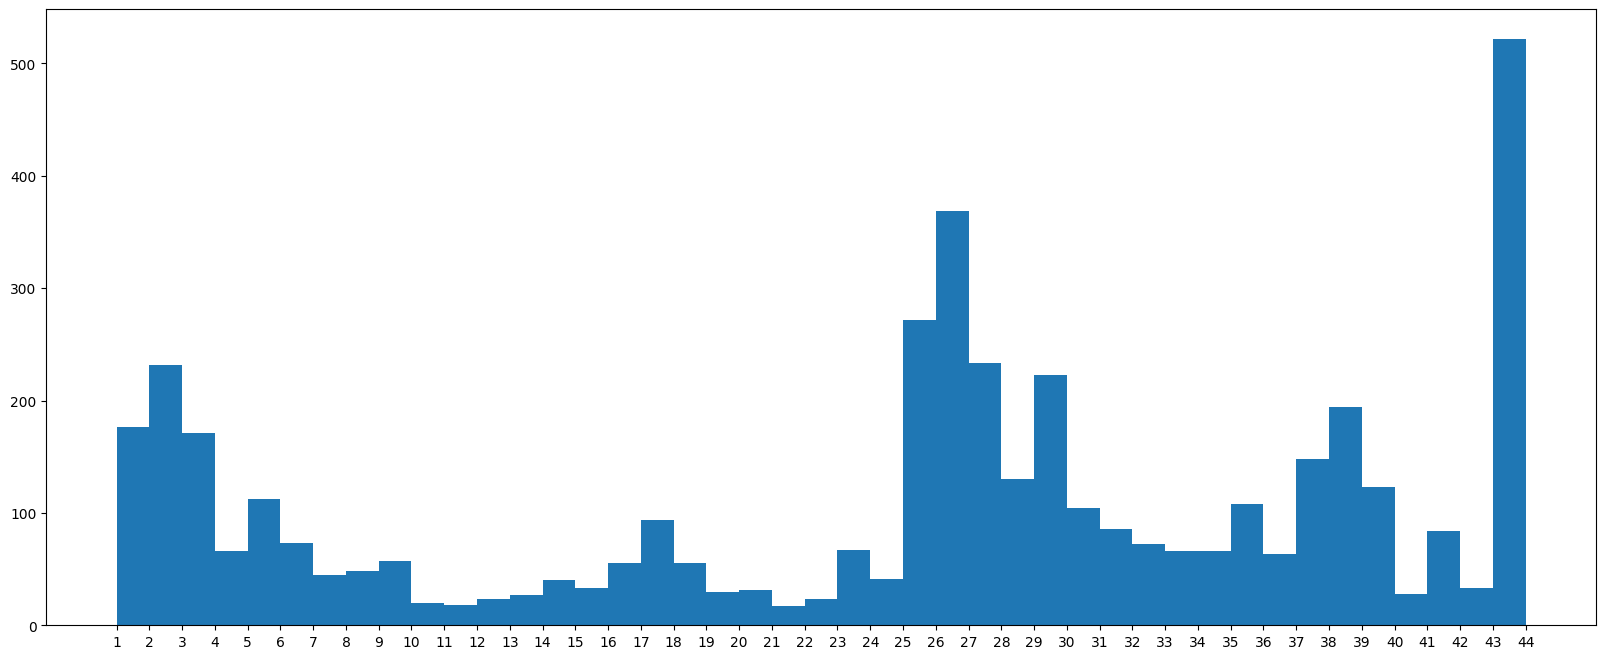

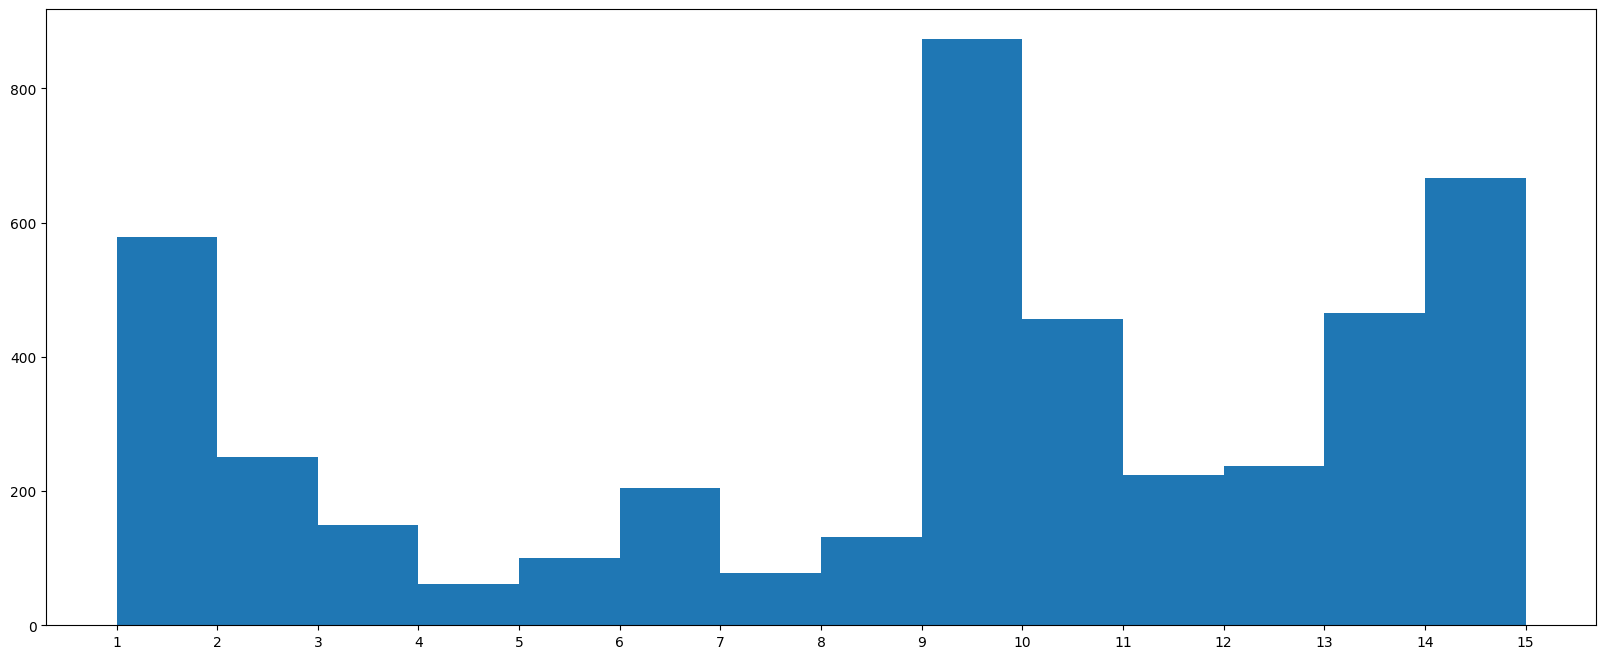

In [3]:
root_path = os.path.dirname(os.getcwd())
data_path = os.path.join(root_path, "brain_tumor_44_classes")
image_list = [data_path + "/" + folder_name + "/" + fname 
                     for folder_name in os.listdir(data_path)
                     for fname in os.listdir(data_path+ "/" + folder_name)]
cluster_labels = []
shortened_cluster_labels = []
for folder_name in os.listdir(data_path):
    for fname in os.listdir(data_path+ "/" + folder_name):
        shortened_cluster_labels.append(folder_name.split(" ")[0])
        cluster_labels.append(folder_name)

label_dict = dict(zip(np.unique(cluster_labels), range(1, len(cluster_labels)+2)))
modified_class = [label_dict[label] for label in cluster_labels]
plt.figure(figsize=(20, 8))
plt.hist(modified_class, bins=list(label_dict.values()))
plt.xticks(list(label_dict.values()))
plt.show()

shortened_label_dict = dict(zip(np.unique(shortened_cluster_labels), range(1, len(shortened_cluster_labels)+2)))
shortened_modified_class = [shortened_label_dict[label] for label in shortened_cluster_labels]
plt.figure(figsize=(20, 8))
plt.hist(shortened_modified_class, bins=list(shortened_label_dict.values()))
plt.xticks(list(shortened_label_dict.values()))
plt.show()

With great class imbalance, we plan to:  
+ Firstly combine the images belong to the same superclass  
+ Secondly choose only those with more than 140 images  
+ Cut short of the number of images from dominant superclasses

In [5]:
count_modified_class = list({i:shortened_modified_class.count(i) for i in shortened_modified_class}.items())
chosen_class = [key for key in shortened_label_dict for k, v in count_modified_class if shortened_label_dict[key] == k if v >= 140]
print(chosen_class)

shortened_cluster_labels = []
image_dict = {}
i = 0
count = 0
for folder_name in os.listdir(data_path):
    if folder_name.split(" ")[0] in chosen_class:
        current_class = chosen_class.index(folder_name.split(" ")[0])
        #print("current class:", current_class)
        #print("i:", i)
        if current_class != i:
            i = current_class
            #print("New i:", i)
            count = 0
        for fname in os.listdir(data_path+ "/" + folder_name):
            if count < 200:
                if folder_name.split(" ")[0] not in image_dict:
                    image_dict[folder_name.split(" ")[0]] = [folder_name + "/" + fname]
                else:
                    image_dict[folder_name.split(" ")[0]].append(folder_name + "/" + fname)
                shortened_cluster_labels.append(folder_name.split(" ")[0])
            count += 1

for tumor_type in list(image_dict.keys):
    image_list = image_dict[

['Astrocitoma', 'Carcinoma', 'Ependimoma', 'Glioblastoma', 'Meningioma', 'Neurocitoma', 'Oligodendroglioma', 'Papiloma', 'Schwannoma', 'Tuberculoma', '_NORMAL']


{'Astrocitoma': ['Astrocitoma T1/005_big_gallery.jpeg',
  'Astrocitoma T1/006_big_gallery.jpeg',
  'Astrocitoma T1/01809e58d2c1e7fff56cc5d8520f5a0500e22624a400948250b05f2ae0a1f177_big_gallery.jpeg',
  'Astrocitoma T1/02df132a56dfb89ece42ee8d195a16_big_gallery.jpeg',
  'Astrocitoma T1/044d8d9984902ca03e652a6f042c57_big_gallery.jpeg',
  'Astrocitoma T1/05899aa824a60c863097d3c9105009c18e25246abea155839c216ceab0273a18_big_gallery.jpeg',
  'Astrocitoma T1/0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg',
  'Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg',
  'Astrocitoma T1/1492ae4325c115eccae71ebb3e995907dbef123dfd9ed8a32d7f8a64bb03115b_big_gallery.jpeg',
  'Astrocitoma T1/18e851456478d638929d5109489574_big_gallery.jpeg',
  'Astrocitoma T1/1b829d504373126112d3a30ca488a6_big_gallery.jpeg',
  'Astrocitoma T1/1c0238417532d40ffca1c260427b39_big_gallery.jpeg',
  'Astrocitoma T1/1d0f25e228a7078503a9f0c97ea738c5eed46c3de3dc3215b60c8add9aa77a62_big_

### Class imbalance:

### Data augmentations

### Other stuff